<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 비교합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [75]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [76]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [77]:
# 데이터 살펴보기
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [78]:
# 기초통계정보 확인
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [79]:
# target 확인
target = 'Species'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target] 

**2) 정규화**

In [80]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [81]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 여러 알고리즘으로 모델을 만들고 성능을 확입니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.KNN

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 n_neighbors=5를 지정합니다.

In [82]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [84]:
# 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [85]:
# 예측하기
y_pred = model.predict(x_test)

In [86]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## 4.2.Decision Tree

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022을 지정합니다.

In [87]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [88]:
# 선언하기
model = DecisionTreeClassifier(max_depth=10,
                              random_state=2022)

In [89]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=2022)

In [90]:
# 예측하기
y_pred = model.predict(x_test)

In [91]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 13  2]
 [ 0  1 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.93      0.87      0.90        15
   virginica       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



## 4.3.Random Forest

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022을 지정합니다.

In [92]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
# 선언하기
model = RandomForestClassifier(max_depth=10,
                              random_state=2022)

In [94]:
# 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=2022)

In [95]:
# 예측하기
y_pred = model.predict(x_test)

In [96]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 15  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [97]:
# 가지고 있는 파라미터 확인
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2022,
 'verbose': 0,
 'warm_start': False}

## 4.4.XGBoost

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022를 지정합니다.

In [98]:
# 불러오기
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [99]:
# 선언하기
model = XGBClassifier(max_depth=10,
                     random_state=2022)

In [100]:
# 학습하기
model.fit(x_train, y_train)

[14:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=2022, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [101]:
# 예측하기
y_pred = model.predict(x_test)

In [102]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 15  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [103]:
# 가지고 있는 파라미터 확인
model.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2022,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

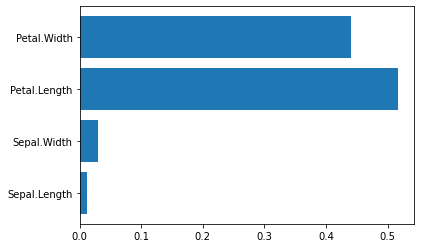

In [104]:
# feature 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

## 4.5.튜닝
- Random Search  
- Grid Search

## 4.5.1튜닝 - Random Search

**1) 모델링 & 튜닝**

- 성능을 확인할 파라미터를 딕셔너리 형태로 선언합니다.

In [105]:
# 파라미터 선언
  # max_depth: 1~50
rand_param = {'n_neighbors':range(1, 51)}

- 사용할 라이브러리를 불러옵니다.

In [106]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

- 다음 두 가지 모델을 선언합니다.
    - 기본 모델: 기본 알고리즘을 사용하는 튜닝 대상 모델
    - 최종 모델: RandomizedSearchCV 알고리즘을 사용하는 모델
- 다음 정보를 최종 모델에 파라미터로 전달합니다.
    - 기본 모델 이름
    - 파라미터 변수
    - cv: K-Fold 분할 개수(기본값=5)
    - n_iter: 시도 횟수(기본값=10)
    - scoring: 평가 방법

> https://scikit-learn.org/stable/modules/model_evaluation.html

In [107]:
# 선언하기
model_knn = KNeighborsClassifier()

# Random Search 선언
  # cv=10
  # n_iter=20
  # scoring='accuracy'
model = RandomizedSearchCV(model_knn,         # 기본 모델 이름
                          rand_param,         # 앞에서 선언한 튜닝용 파라미터 변수
                          cv=10,              # K-Fold Cross Validation(default=5)
                          n_iter=20,          # Random하게 시도할 횟수(default=10)
                          scoring='accuracy', # 평가 방법
                          n_jobs=-1)          # cpu성능 좋아지게 병렬처리

In [108]:
# 가지고 있는 파라미터 확인
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [109]:
# 학습
model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=20,
                   n_jobs=-1, param_distributions={'n_neighbors': range(1, 51)},
                   scoring='accuracy')

**2) 결과 확인**

- model.cv_results_ 속성에 성능 테스트와 관련된 많은 정보가 포함되어 있습니다.

In [110]:
model.cv_results_

{'mean_fit_time': array([0.00508509, 0.00505912, 0.00525606, 0.00526671, 0.00513954,
        0.00509822, 0.00456541, 0.00666404, 0.00654404, 0.00465307,
        0.00568991, 0.00567837, 0.00494888, 0.00523198, 0.00557523,
        0.00549858, 0.00555298, 0.00706043, 0.0073313 , 0.00770035]),
 'std_fit_time': array([0.00081999, 0.00069244, 0.00073125, 0.0013736 , 0.00067384,
        0.00072874, 0.0004513 , 0.00540799, 0.00352677, 0.00040361,
        0.00218854, 0.0006541 , 0.0008862 , 0.00085723, 0.00097404,
        0.00131475, 0.00147098, 0.00258191, 0.00410702, 0.00361068]),
 'mean_score_time': array([0.00559855, 0.00573816, 0.00570228, 0.00678518, 0.00621302,
        0.00640664, 0.00558977, 0.00756049, 0.00588498, 0.0049516 ,
        0.00674887, 0.00577245, 0.00928671, 0.00583534, 0.00634971,
        0.00575984, 0.00652337, 0.00578003, 0.00575058, 0.00783796]),
 'std_score_time': array([0.00048141, 0.0015707 , 0.00103979, 0.00216441, 0.00197126,
        0.00158005, 0.00078458, 0.003345

- 이 중 중요한 정보를만 추출해서 확인합니다.
- 다음 3가지는 꼭 기억해야 합니다.
    - model.cv_results_['mean_test_score']: 테스트로 얻은 성능
    - model.best_params_: 최적의 파라미터
    - model.best_score_: 최고의 성능

In [111]:
# mean_test_score
print(model.cv_results_['mean_test_score'])
print('=' * 70)
print('최적파라미터:',model.best_params_)
print('-' * 70)
print('최고성능:', model.best_score_)

[0.96090909 0.88545455 0.89545455 0.94181818 0.87636364 0.94181818
 0.88545455 0.88545455 0.89545455 0.96090909 0.88545455 0.95181818
 0.87636364 0.94181818 0.88545455 0.88545455 0.92363636 0.96090909
 0.93272727 0.93272727]
최적파라미터: {'n_neighbors': 9}
----------------------------------------------------------------------
최고성능: 0.9609090909090909


In [112]:
# 최적 파라미터로 학습된 최종 모델
model.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [113]:
# 예측하기
y_pred = model.predict(x_test)

In [114]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 15  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 4.5.2튜닝 - Grid Search

In [118]:
# 불러오기
from sklearn.model_selection import GridSearchCV

# 매개변수 값 범위 선언(=변수 선언)
param = {'max_depth':range(1, 16),
        'n_estimators':range(10, 151, 10)}

# 기본 모델 선언
model_rfc = RandomForestClassifier(random_state=2022)

# 튜닝
model = GridSearchCV(model_rfc,
                          param,
                          cv=10,
#                           scoring='accuracy',
                          n_jobs=-1)
# 학습
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 15  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [119]:
# 확인
print(model.best_params_)
print(model.best_score_)

{'max_depth': 2, 'n_estimators': 40}
0.9518181818181819


In [120]:
# 가지고 있는 파라미터 확인
model.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 2022,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(random_state=2022),
 'n_jobs': -1,
 'param_grid': {'max_depth': range(1, 16), 'n_estimators': range(10, 151, 10)},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [122]:
# 불러오기
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# 매개변수 값 범위 선언(=변수 선언)
grid_param = {'max_depth':range(5, 16),
             'n_estimators':range(50, 151, 10)}

# 기본 모델 선언
model_xgb = XGBClassifier(random_state=2022)

# 튜닝
model = GridSearchCV(model_xgb,
                    grid_param,
                    cv=10,
                    n_jobs=-1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[15:01:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[14  0  0]
 [ 0 15  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



scoring의 값을 별도로 지정해 주지 않을 시, GridSearchCV와 RandomizedSearchCV 모두 scoring의디폴트 값이 None이기는 하나,

이러한 경우 튜닝을 진행하는 알고리즘 내 자체적으로 존재하는 score 메소드를 사용합니다.

대체로 회귀의 경우 r2, 분류의 경우 accuracy를 score 메소드에서 사용합니다.

In [123]:
# 확인
print(model.best_params_)
print(model.best_score_)

{'max_depth': 5, 'n_estimators': 50}
0.9418181818181818


In [124]:
# 가지고 있는 파라미터 확인
model.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__objective': 'binary:logistic',
 'estimator__use_label_encoder': True,
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__enable_categorical': False,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__num_parallel_tree': None,
 'estimator__predictor': None,
 'estimator__random_state': 2022,
 'estimator__reg_alpha': None,
 'estimator__reg_lambda': None,
 'estimator__scale_pos_weight': None,
 'estimator__subsample': None,
 'estimator__tree_method

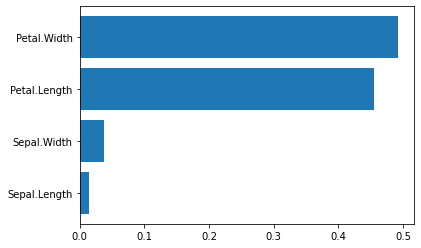

In [125]:
# feature 중요도 시각화
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()